In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

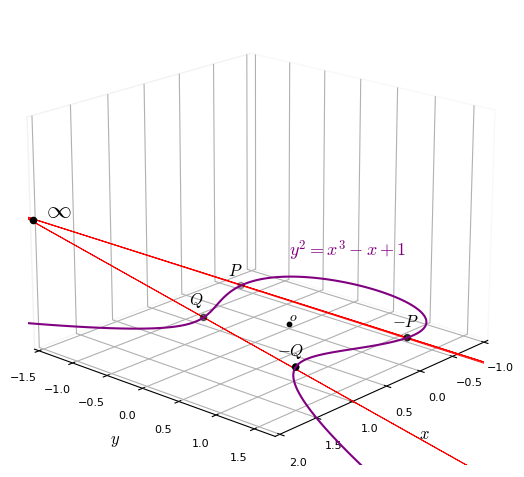

In [230]:
fig = plt.figure()
ax = plt.axes(projection='3d')

#! if youre reading this, know I'm well aware this code is shit

a = -1
b = 1

# change font to a math serif
# mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['font.size'] = 8

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
Z = Y**2 - X**3 - a*X - b
ax.contour(X,Y,Z,[0],colors='purple')

# label the curve
ax.text(0, 0, 0.32, r'$y^2 = x^3 - x + 1$', color='purple', fontsize=13)

# change the axes
# ax.plot([0,0],[-10,10],[0,0],c='k')
# ax.plot([-10,10],[0,0],[0,0],c='k')
# ax.plot([0,0],[0,0],[-10,10],c='k')

ax.set_xlim(-1,2)
ax.set_ylim(-1.5,1.7)
ax.set_zlim(0,1)


ax.scatter(0,0,0,c='k',s=10)
ax.text(0,0,0.02,r'$o$',size=10,zorder=1,color='k')

def curve(x, sign):
    return np.sqrt(x**3 + a*x + b) * sign


points = [
  [-0.5, -0.5, .8,.43],
  [curve(-0.5, 1), curve(-0.5, -1), curve(.8, 1), curve(.43, -1)],
]

ax.scatter(xs=points[0],ys=points[1],zs=[0,0,0,0], c='k', s=20, zorder=3)


#draw lines through the points and (0,0,1) extending all the way
# get the line equation from the points
# 3d line eq
def line_eq(p1, p2):
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    # direction vector
    v = [x2-x1, y2-y1, z2-z1]
    return v

tuples = [(-0.5,curve(-0.5,1),0), (-0.5,curve(-0.5,-1),0)]
  
for point in tuples:
    dv = line_eq(point, [-0.5,-3.75,0.005])
    
    t = np.linspace(-10,10,1000)
    x = point[0] + dv[0]*t
    y = point[1] + dv[1]*t
    z = point[2] + dv[2]*t
    ax.plot(x,y,z,zorder=1,linewidth=0.7, c='red')

# y = np.linspace(-10,10,1000)
# x = y*0-0.5

# # ax.plot(x,y,zorder=1,linewidth=0.6, c='black')

text = [r'$P$', r'$-P$']

for i, p in enumerate(tuples):
    ax.text(p[0]-.05, p[1]-.25, 0.02, text[i-1], size=12, zorder=1, color='k')
    

    
ax.text(-0.5, -4.3, 0.04, r'$\infty$', size=18, zorder=1, color='k')

# POINT at inifinty
ax.scatter(-0.40,-4.4,0.025,c='k',s=20)

# ax.text(-0.02,0.15,1,r'$\infty$',size=20,zorder=1,color='k')

tuples2 = [(.8,curve(.8,1),0), (.37,curve(.37,-1),0)]

text = [r'$-Q$', r'$Q$']

for i, p in enumerate(tuples2):
    ax.text(p[0]+0.05, p[1]-.2, 0.04, text[i], size=12, zorder=1, color='k')

# for point in tuples2:
#     dv = line_eq(point, [-0.5,-3.75,0.005])
    
#     t = np.linspace(-10,10,1000)
#     x = point[0] + dv[0]*t
#     y = point[1] + dv[1]*t
#     z = point[2] + dv[2]*t
#     ax.plot(x,y,z,zorder=1,linewidth=0.5, c='red')
    
dv2 = line_eq(tuples2[0], [-0.3,-3.75,0.005])
t = np.linspace(-10,10,1000)
x = tuples2[0][0]+0.03 + dv2[0]*t
y = tuples2[0][1] + dv2[1]*t
z = tuples2[0][2] + dv2[2]*t
ax.plot(x,y,z,zorder=1,linewidth=0.7, c='red')

# change the viewing angle
ax.view_init(19, 42)


# label axes
ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$y$', fontsize=12)
# ax.set_zlabel('z')

# remove z axis
ax.w_zaxis.line.set_lw(0.)
ax.set_zticks([])
ax.set_zticklabels([])
ax.set_zlim(0,1)
# remove the background z
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# remove the grid lines
ax.zaxis.pane.set_edgecolor('w')



ax.dist = 9

plt.tight_layout()


plt.savefig('3dplot.png', dpi=400)
